In [ ]:
# pip install fastcore fastdownload fastai  ddgs wget fastbook

In [ ]:
import os
import random
import shutil
import wget  # You may need to run: pip install python-wget

# --- IMPORTANT: Make sure you have the correct libraries installed ---
# pip uninstall duckduckgo-search -y
# pip install ddgs
# pip install fastcore
# pip install python-wget

try:
    from ddgs import DDGS
    from fastcore.all import *
except ImportError:
    print("Required libraries not found. Please run:")
    print("pip install ddgs fastcore python-wget")
    exit()

# --- 1. PROXY CONFIGURATION ---
# Your list of proxy servers.
proxy_list = [
    {"ip": "142.111.48.253", "port": "7030", "user": "hdyzotkg", "pass": "oty7idk0yfc8"},
    {"ip": "198.23.239.134", "port": "6540", "user": "hdyzotkg", "pass": "oty7idk0yfc8"},
    {"ip": "45.38.107.97",  "port": "6014", "user": "hdyzotkg", "pass": "oty7idk0yfc8"},
    {"ip": "107.172.163.27","port": "6543", "user": "hdyzotkg", "pass": "oty7idk0yfc8"},
    {"ip": "64.137.96.74",  "port": "6641", "user": "hdyzotkg", "pass": "oty7idk0yfc8"},
    {"ip": "154.203.43.247","port": "5536", "user": "hdyzotkg", "pass": "oty7idk0yfc8"},
    {"ip": "84.247.60.125", "port": "6095", "user": "hdyzotkg", "pass": "oty7idk0yfc8"},
    {"ip": "216.10.27.159", "port": "6837", "user": "hdyzotkg", "pass": "oty7idk0yfc8"},
    {"ip": "142.111.67.146","port": "5611", "user": "hdyzotkg", "pass": "oty7idk0yfc8"},
    {"ip": "142.147.128.93","port": "6593", "user": "hdyzotkg", "pass": "oty7idk0yfc8"},
]

def get_random_proxy_string():
    """
    Selects a random proxy and returns it in the required string format.
    THE FIX: The 'ddgs' library requires a single string like "http://user:pass@ip:port".
    """
    p = random.choice(proxy_list)
    return f"http://{p['user']}:{p['pass']}@{p['ip']}:{p['port']}"

# --- 2. CORE FUNCTIONS ---

def search_images(keywords, max_images=50):
    """
    Searches for image URLs using DDGS with a randomly assigned proxy.
    THE FIX: Uses the updated 'ddgs' library and the singular 'proxy' parameter.
    """
    print(f"Searching for '{keywords}' images...")
    proxy = get_random_proxy_string()
    print(f"Using proxy: {proxy.split('@')[1]}") # Print proxy IP without credentials

    try:
        with DDGS(proxy=proxy) as ddgs:
            # The 'ddgs.images' method returns a generator, so we convert it to a list
            results = list(ddgs.images(keywords, max_results=max_images))
            print(f"Len of results is {len(results)}")
            # Extract just the image URLs from the list of result dictionaries
            return L(results).itemgot('image')
    except Exception as e:
        print(f"An error occurred during search: {e}")
        return [] # Return an empty list on failure

def download_images(urls, folder_path, file_prefix):
    """
    Downloads images from a list of URLs into a specified folder.
    """
    if not urls:
        print("No image URLs to download.")
        return

    print(f"\nDownloading {len(urls)} images to '{folder_path}' folder...")
    # Create the target directory if it doesn't exist
    os.makedirs(folder_path, exist_ok=True)

    download_count = 0
    for i, url in enumerate(urls):
        try:
            # Construct the full path: folder_name/prefix_0.jpg
            file_path = os.path.join(folder_path, f"{file_prefix}_{i}.jpg")

            # Download the file to the new path
            wget.download(url, out=file_path)
            download_count += 1
            # wget prints its own progress, so we add a newline for cleaner output
            print() # Newline after each download
        except Exception as e:
            # Add a newline to separate from wget's potential output
            print(f"\nFailed to download {url}. Error: {e}")

    print(f"\nFinished downloading. Successfully downloaded {download_count}/{len(urls)} images.")

def reset_folder(folder_path):

    print(f"\nPreparing to reset folder: '{folder_path}'")
    if os.path.isdir(folder_path):
        try:
            shutil.rmtree(folder_path)
            print(f"Successfully deleted folder and all its contents.")
        except Exception as e:
            print(f"Error deleting folder: {e}")
            return

    # Recreate the empty folder
    os.makedirs(folder_path)
    print(f"Successfully created empty folder.")


# --- 3. MAIN EXECUTION ---

if __name__ == "__main__":
    DOWNLOAD_FOLDER = os.getcwd()+'/grizzly'
    reset_folder(DOWNLOAD_FOLDER)
    # --- Configuration ---
    SEARCH_TERM = "grizzly bear"


    MAX_IMAGES_TO_FIND = 100


    image_urls = search_images(SEARCH_TERM, max_images=MAX_IMAGES_TO_FIND)

    if image_urls:
        download_images(image_urls, DOWNLOAD_FOLDER, file_prefix="grizzly")
    else:
        print("\nCould not find any images. Aborting download.")


Preparing to reset folder: '/content/grizzly'
Successfully created empty folder.
Searching for 'grizzly bear' images...
Using proxy: 45.38.107.97:6014
Len of results is 99







Failed to download https://www.publicdomainpictures.net/pictures/240000/velka/grizzly-bear-portrait-1511961987XRY.jpg. Error: HTTP Error 403: Forbidden





Failed to download https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/Jasper_Dwayne_Reilander-4.jpg/440px-Jasper_Dwayne_Reilander-4.jpg. Error: HTTP Error 403: Forbidden


Failed to download https://commonsenseevaluation.com/wp-content/uploads/2013/08/Bear.jpg. Error: HTTP Error 406: Not Acceptable





Failed to download https://coolwallpapers.me/picsup/2815078-bears-nature-animals-grizzly-bear-grizzly-bears___animal-wallpapers.jpg. Error: HTTP Error 403: Forbidden



Failed to download https://rare-gallery.com/uploads/posts/4533550-bears-sadness-grizzly-bear-brown-bear-grizzly-bears-animals.jpg. Error: HTTP Error 403: Forbidden



Failed to downl

KeyboardInterrupt: 

In [ ]:

from fastbook import *
from fastai.vision.widgets import *

class DataLoaders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train,valid = add_props(lambda i,self: self[i])

In [ ]:

path = Path(os.getcwd() + '/bears')
print(path)

/content/bears


In [ ]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=20,nrows=4)

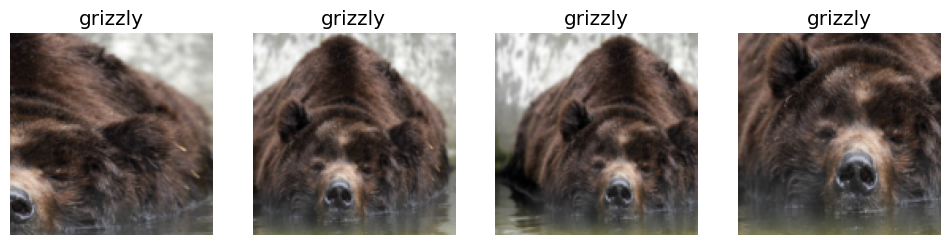

In [ ]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

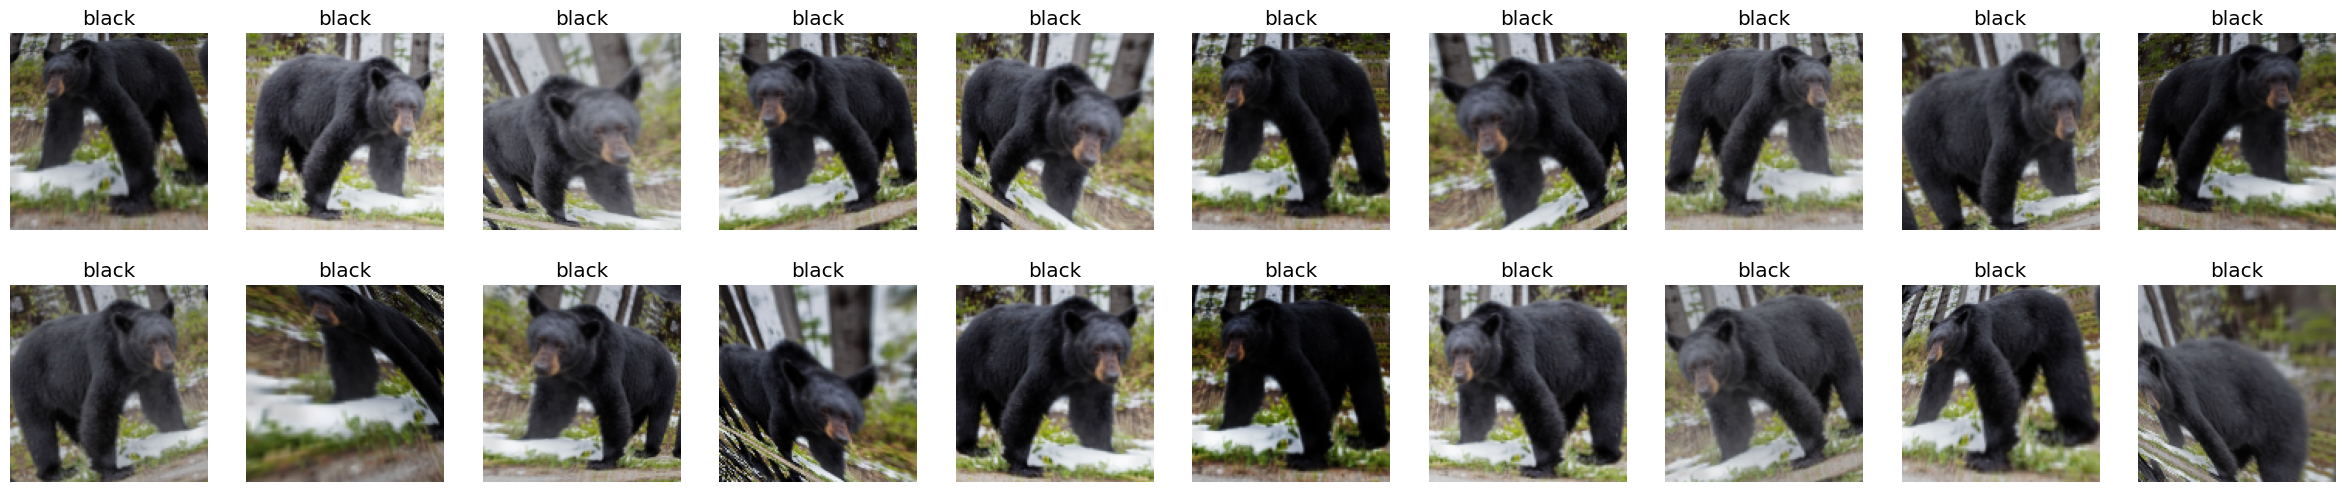

In [ ]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=20, nrows=2, unique=True)

In [ ]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

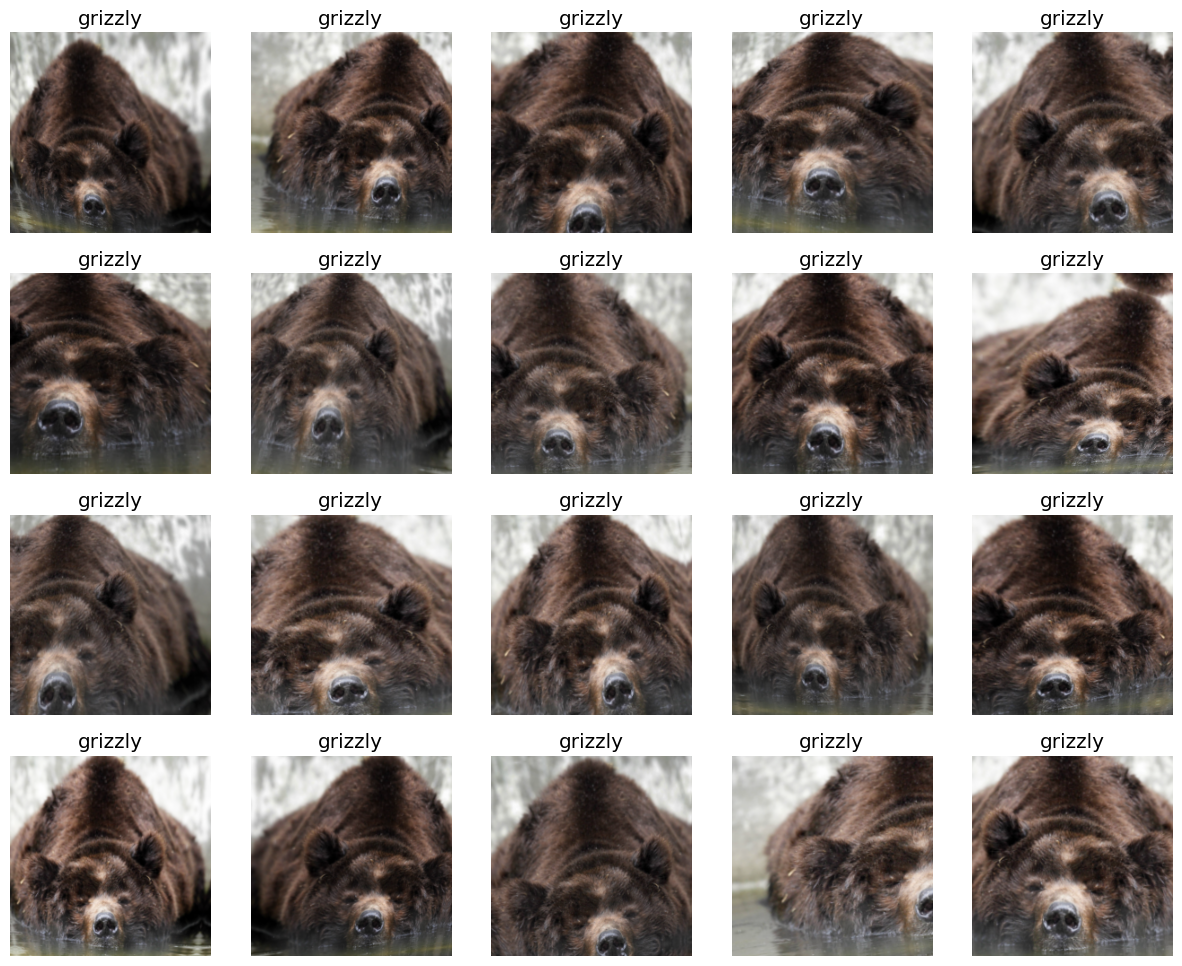

In [ ]:
dls.train.show_batch(max_n =20, nrows=4,unique=True)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

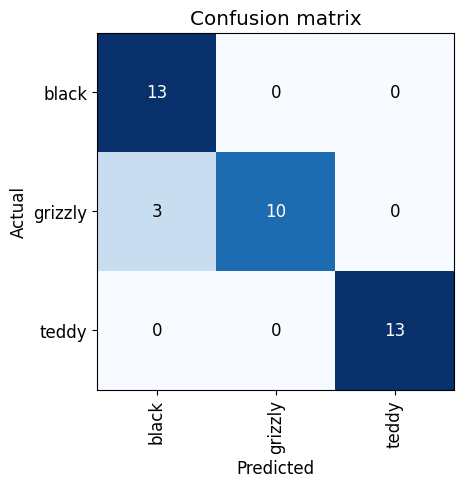

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

FileNotFoundError: [Errno 2] No such file or directory: '/content/bears/black/grizzly_76.jpg'

In [ ]:
cleaner.delete()

(#1) [0]